### Titanic Survival Prediction

worked on a binary classification problem to predict the survival of passengers from the Titanic crash. Given dataset named **`"titanic.csv"`** which includes various features of passengers to predict whether they survived or not. The dataset comprises the following columns:

- `passenger_id:` The unique identifier for each passenger.
- `name:` The name of the passenger.
- `p_class:` The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- `sex:` The gender of the passenger.
- `age:` The age of the passenger.
- `sib_sp:` The number of siblings or spouses the passenger had aboard the Titanic.
- `parch:` The number of parents or children the passenger had aboard the Titanic.
- `ticket:` The ticket number of the passenger.
- `fare:` The fare the passenger paid for the ticket.
- `cabin:` The cabin number where the passenger stayed.
- `embarked:` The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
- `survived:` Whether the passenger survived (1) or not (0).

Built and evaluated a `Gaussian Naive Bayes` model to predict whether a passenger survived based on 

In [1]:
import pandas as pd

### Data Preparation and Exploration


In [2]:
df = pd.read_csv("titanic.csv")

print(df.shape)

df.head()

(891, 12)


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
df.isna().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [4]:
df.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
df.drop(['passenger_id','name','sib_sp','parch','ticket','cabin','embarked'],axis=1,inplace=True)

In [17]:
df.head()

,p_class,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,NaN,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


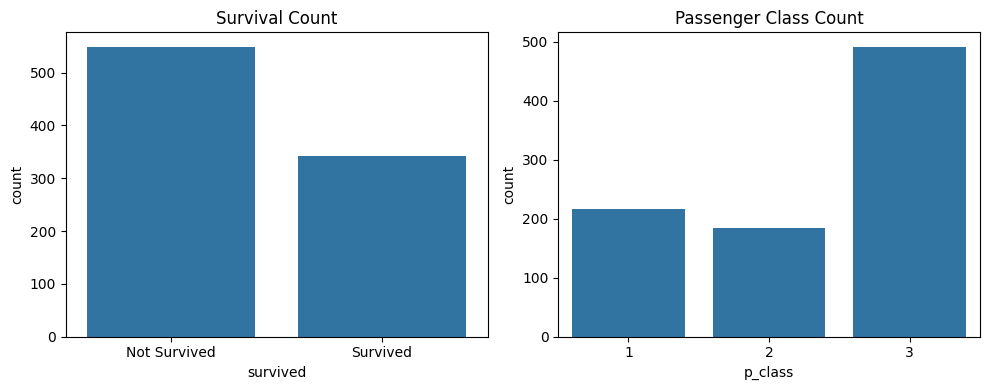

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Survival count
sns.countplot(data=df, x='survived', ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Survived', 'Survived'])
axes[0].set_title('Survival Count')

# Passenger class count
sns.countplot(data=df, x='p_class', ax=axes[1])
axes[1].set_title('Passenger Class Count')

plt.tight_layout()
plt.show()

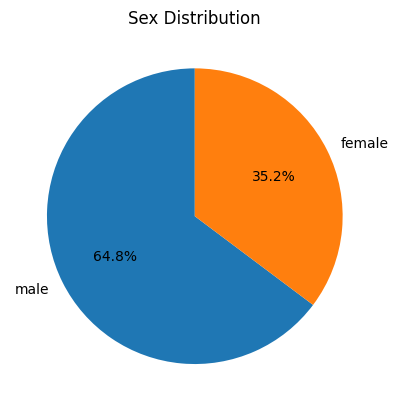

In [68]:
sex_count = df.sex.value_counts()
plt.pie(x=sex_count.values,labels=sex_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Sex Distribution")
plt.show()

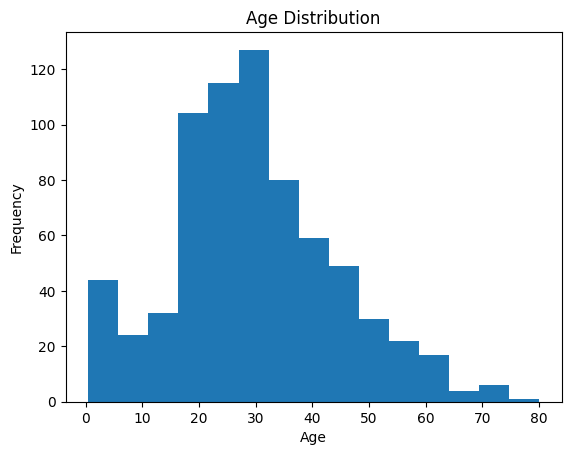

In [71]:
df['age'].plot(kind='hist',bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

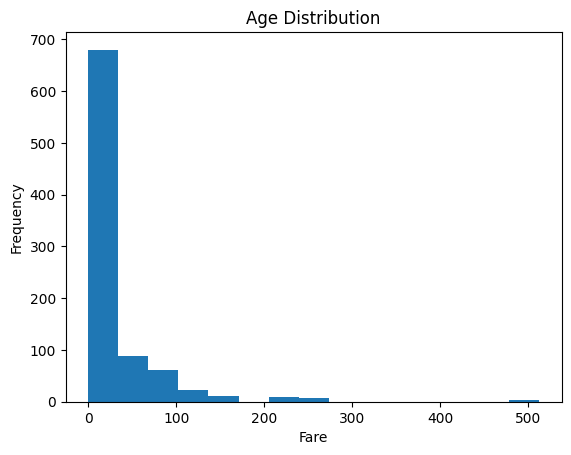

In [73]:
df['fare'].plot(kind='hist',bins=15)
plt.title('Age Distribution')
plt.xlabel('Fare')
plt.show()

### Data Preprocessing


In [78]:
age_median = df.age.median()
df.age.fillna(age_median,inplace=True)
df.fare.fillna(df.fare.median(),inplace=True)

In [79]:
df.isna().sum()

p_class     0
sex         0
age         0
fare        0
survived    0
dtype: int64

In [83]:
df = pd.get_dummies(data=df,columns=['sex'],drop_first=True)
df.head(3)

,p_class,age,fare,survived,sex_male
0,3,22.0,7.2500,0,True
1,1,38.0,71.2833,1,False
2,3,26.0,14.4542,1,False


In [94]:
df.describe()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['fare'] = scaler.fit_transform(df[['fare']])


,p_class,age,fare,survived,sex_male
0,3,22.0,-0.500819,0,True
1,1,38.0,0.788518,1,False
2,3,26.0,-0.355760,1,False


In [96]:
X = df.drop('survived',axis=1)
y = df['survived']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


### Model Training Using Gaussian Naive Bayes


In [97]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       155
           1       0.74      0.73      0.73       113

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



<Axes: >

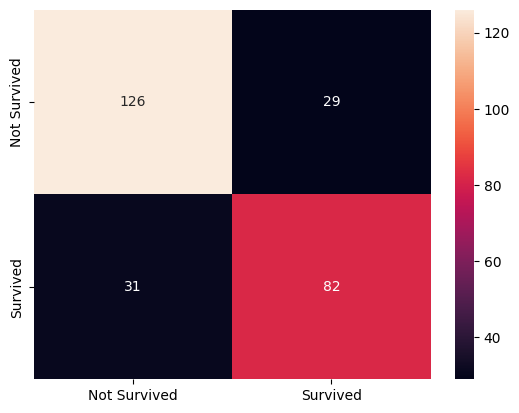

In [103]:
cm = confusion_matrix(y_pred,y_test)
labels = ['Not Survived','Survived']
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels,yticklabels=labels)